# Bitcoin Data Analysis
#### Oct 2019  |   Work in Progress   |   Jason Su

## Introduction

Bitcoin was the first cryptocurrency and is still the largest cyrptocurrency by market capitalization. Some people think of it as an investment vehicle (similar to commodities in nature) while others think of it as a store of value (similar to gold). Bitcoin was designed to be a decentralized global virtual currency with minimum friction in transactions and a high level of security due to the nature of its underlying blockchain network. Since its inception Bitcoin has been rapidly adopted by enthusiasts and investors worldwide. Now it is traded on multiple online exchanges on the internet by virtually everyone in the world. Consequently, the number of factors affecting the price movements of the Bitcoins is huge and the underlying mechanisms are complex. Every investor wishes to gain a competitive advantage in predicting the price movements of Bitcoins. In this notebook I try to analyze the relationships between historical Bitcoin price movements and other relevant indicators such as the level of Bitcoin adoption, the level of difficulty in Bitcoin mining, etc, with the objective to gain insights into how different factors would affect the prices of Bitcoins and how this knowledge would convert to a strategic advantage in everyday Bitcoin trading. 

## Data Wrangling

First let's obtain and clean our Bitcoin price dataset to get ready for analysis.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # making plots and charts
import requests # getting data through APIs

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/bitcoin-tweets-and-price/Data_To_Hourervals_no_filter.csv
/kaggle/input/bitcoin-tweets-and-price/df_Final.csv
/kaggle/input/bitcoin-historical-data/bitstampUSD_1-min_data_2012-01-01_to_2019-08-12.csv
/kaggle/input/bitcoin-historical-data/coinbaseUSD_1-min_data_2014-12-01_to_2019-01-09.csv
/kaggle/input/bitcoin-my-wallet-number-of-users/BCHAIN-MWNUS.csv
/kaggle/input/bitcoin-difficulty/BCHAIN-DIFF.csv


### Historical Bitcoin Price Data

The following dataset comes from [here](https://www.kaggle.com/mczielinski/bitcoin-historical-data) (Bitcoin price data at 1-minute intervals from select exchanges during the time period from Jan 2012 to August 2019): 

In [2]:
# Import the data from CSV file and save it to a dataframe

bitstamp = pd.read_csv('../input/bitcoin-historical-data/bitstampUSD_1-min_data_2012-01-01_to_2019-08-12.csv')

In [3]:
# Inspect the first a few rows of the data to see what potential cleaning is needed

bitstamp.head()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,1325317920,4.39,4.39,4.39,4.39,0.455581,2.0,4.39
1,1325317980,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1325318040,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1325318100,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1325318160,NaN,NaN,NaN,NaN,NaN,NaN,NaN


hmmm.... Seems there are a lot of missing values, and the first column is coded in Unix time.

In [4]:
# Check the number of rows, columns and the datatypes of each column

bitstamp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3997697 entries, 0 to 3997696
Data columns (total 8 columns):
Timestamp            int64
Open                 float64
High                 float64
Low                  float64
Close                float64
Volume_(BTC)         float64
Volume_(Currency)    float64
Weighted_Price       float64
dtypes: float64(7), int64(1)
memory usage: 244.0 MB


There are 8 columnns and around 4 million rows of data. The datatypes seem to be fine since they are mostly float64, which is suitable for price data.

In [5]:
# Quickly check the statistics of all the data in each column to see if they make sense
# Based on my common sense historically the prices of Bitcoins went from 0 to an all 
# time high of around $20,000 per coin

bitstamp.describe()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
count,3.997697e+06,2.765819e+06,2.765819e+06,2.765819e+06,2.765819e+06,2.765819e+06,2.765819e+06,2.765819e+06
mean,1.445483e+09,3.059659e+03,3.062027e+03,3.057022e+03,3.059638e+03,1.042232e+01,2.686812e+04,3.059499e+03
std,6.940318e+07,3.741168e+03,3.744835e+03,3.736985e+03,3.741134e+03,3.375010e+01,9.620425e+04,3.740910e+03
min,1.325318e+09,3.800000e+00,3.800000e+00,1.500000e+00,1.500000e+00,0.000000e+00,0.000000e+00,3.800000e+00
25%,1.385283e+09,3.742700e+02,3.745200e+02,3.740000e+02,3.742500e+02,4.530000e-01,2.865515e+02,3.742434e+02
50%,1.445637e+09,7.794500e+02,7.799100e+02,7.790100e+02,7.794900e+02,2.100451e+00,2.209966e+03,7.794137e+02
75%,1.505603e+09,5.635745e+03,5.639500e+03,5.631100e+03,5.635355e+03,8.179424e+00,1.554689e+04,5.635118e+03
max,1.565568e+09,1.966576e+04,1.966600e+04,1.964996e+04,1.966575e+04,5.853852e+03,7.569437e+06,1.966330e+04


The mean, min and max values of each price column here seems to be in line with my impressions.

[Future work] Add a test of normality

In [42]:
# Inspect the shape of the dataset

bitstamp.shape

(3997697, 8)

In [43]:
# There are around 1.2 million rows of data with missing values

bitstamp['Open'].value_counts(dropna = False)

5.00        7999
5.07        7236
4.91        6188
5.08        6015
5.03        5435
            ... 
5980.63        1
9648.71        1
4407.21        1
16398.98       1
12700.02       1
Name: Open, Length: 680540, dtype: int64

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='hist')` instead of `Series.plot('hist',)`.
  This is separate from the ipykernel package so we can avoid doing imports until


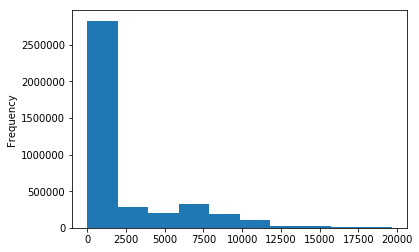

In [44]:
# Do a quick histogram plot here to see the distribution of prices

bitstamp['Open'].plot('hist')

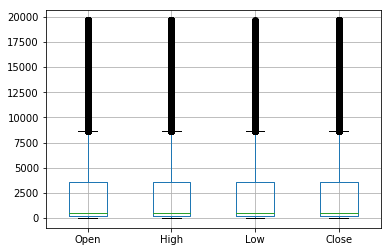

In [45]:
# Do a quick box plot here to see the distribution of prices

bitstamp.boxplot(column=['Open', 'High', 'Low', 'Close'])

In [46]:
# Set the index of the dataset to be the time of each observation in YYYY-MM-DD HH-MM-SS

bitstamp.set_index(pd.to_datetime(bitstamp['Timestamp'], unit='s'), inplace=True, drop=True)

In [47]:
# Inspect the dataset again

bitstamp.head()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
Timestamp,,,,,,,,
2011-12-31 07:52:00,1325317920,4.39,4.39,4.39,4.39,0.455581,2.0,4.39
2011-12-31 07:53:00,1325317980,4.39,4.39,4.39,4.39,0.455581,2.0,4.39
2011-12-31 07:54:00,1325318040,4.39,4.39,4.39,4.39,0.455581,2.0,4.39
2011-12-31 07:55:00,1325318100,4.39,4.39,4.39,4.39,0.455581,2.0,4.39
2011-12-31 07:56:00,1325318160,4.39,4.39,4.39,4.39,0.455581,2.0,4.39


In [48]:
# Fill the missing values using the forward fill method. 
# This method is appropriate here since the missing values in the original dataset were caused
# by the fact that there were not trading actions during those time periods, so it is safe to assume
# that the prices remained constant when there were no trading. Forward fill method takes the latest
# price data up to that point and filled it forward in time.

bitstamp.fillna(method = 'ffill', inplace = True)

In [49]:
# Inspect again

bitstamp.head()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
Timestamp,,,,,,,,
2011-12-31 07:52:00,1325317920,4.39,4.39,4.39,4.39,0.455581,2.0,4.39
2011-12-31 07:53:00,1325317980,4.39,4.39,4.39,4.39,0.455581,2.0,4.39
2011-12-31 07:54:00,1325318040,4.39,4.39,4.39,4.39,0.455581,2.0,4.39
2011-12-31 07:55:00,1325318100,4.39,4.39,4.39,4.39,0.455581,2.0,4.39
2011-12-31 07:56:00,1325318160,4.39,4.39,4.39,4.39,0.455581,2.0,4.39


In [51]:
# Also check the latest data. These values seem to make sense as compared to the actual prices in August this year

bitstamp.tail()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
Timestamp,,,,,,,,
2019-08-11 23:56:00,1565567760,11555.57,11555.57,11540.37,11540.58,0.036868,425.909106,11552.336234
2019-08-11 23:57:00,1565567820,11553.49,11556.22,11553.49,11556.22,0.623462,7204.428272,11555.520505
2019-08-11 23:58:00,1565567880,11559.73,11561.22,11546.77,11561.22,0.159070,1838.731403,11559.252199
2019-08-11 23:59:00,1565567940,11559.73,11589.73,11528.73,11528.73,16.198210,187504.635170,11575.638889
2019-08-12 00:00:00,1565568000,11527.44,11551.57,11520.00,11520.00,23.805939,274731.256920,11540.450291


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='hist')` instead of `Series.plot('hist',)`.
  This is separate from the ipykernel package so we can avoid doing imports until


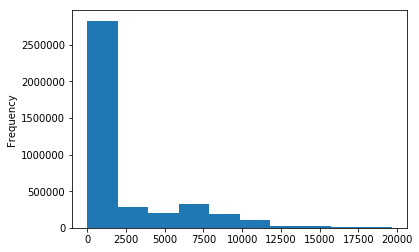

In [52]:
# Plot a histogram again to check the price distributions

bitstamp['Close'].plot('hist')

[Future work] plot histogram in log scale too

In [53]:
# Save the useful columns from the original dataset into a new and clean dataset called bitstamp_clean

bitstamp_clean = bitstamp.loc[:, ['Open', 'High', 'Low', 'Close', 'Volume_(BTC)', 'Volume_(Currency)', 'Weighted_Price']]

In [54]:
# Inspect the information of the clean dataset

bitstamp_clean.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3997697 entries, 2011-12-31 07:52:00 to 2019-08-12 00:00:00
Data columns (total 7 columns):
Open                 float64
High                 float64
Low                  float64
Close                float64
Volume_(BTC)         float64
Volume_(Currency)    float64
Weighted_Price       float64
dtypes: float64(7)
memory usage: 244.0 MB


The below is a chart of the price of bitcoin going from 2012 to 2019. Similar plots can be found at any website which lists the price of bitcoin.

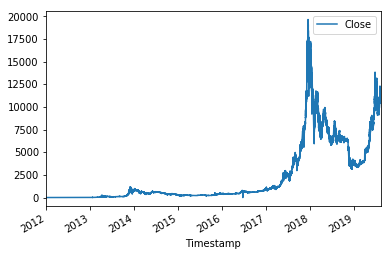

In [55]:
# Plot the time series price data

bitstamp_clean.plot(y='Close')

The above plot only tells part of the story. To make more sense of such a volatile dataset, let's plot the same values again but in log scales to see the trends in more appropriate scales.

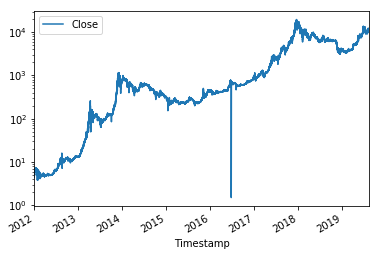

In [56]:
# Create a log-log plot of the closing prices for the past 7 years

bitstamp_clean.plot(y='Close', logx=True, logy=True)

Now the trend of the prices seem to be more clear. There is a steady increasing trend over the past 7 years for Bitcoin prices.

Now let's import an additional dataset "[Bitcoin My Wallet Number of Users](https://www.quandl.com/data/BCHAIN/MWNUS)" which tells us the number of Bitcoin wallets using My Wallet Services on a global scale. This is an indicator of the degree of adoption of Bitcoins worldwide.

In [57]:
# Obtain Bitcoin wallet data from Quandl 
# (which is a dataset of number of wallets hosts using My Wallet Service on each day from 2009 to 2019. )

wallet = pd.read_csv('../input/bitcoin-my-wallet-number-of-users/BCHAIN-MWNUS.csv')

In [58]:
# Inspect the first 5 rows to see the latest wallet data

wallet.head()

,Date,Value
0,2019-10-27,42925721.0
1,2019-10-26,42903322.0
2,2019-10-25,42878958.0
3,2019-10-24,42854235.0
4,2019-10-23,42830080.0


In [59]:
# Inspect the last 5 rows to see the oldest data from 2009

wallet.tail()

,Date,Value
3921,2009-01-07,2.0
3922,2009-01-06,2.0
3923,2009-01-05,2.0
3924,2009-01-04,2.0
3925,2009-01-03,2.0


Back then there were only 2 wallets!

In [60]:
# Convert the date column to datetime format for easier processing later
# Also rename the columns while we are here

wallet['Date'] = pd.to_datetime(wallet['Date'])
wallet.rename(columns = {'Date': 'Date', 'Value': 'Wallets'}, inplace = True)

In [61]:
# Group our Bitcoin price data by day so that it could be plotted on the same scale
# against the daily wallet data

bitstamp_clean_day = bitstamp_clean.resample('D').mean()

In [62]:
# Create a date column in the bitstamp_clean_day dataframe

bitstamp_clean_day['Date'] = bitstamp_clean_day.index

In [63]:
# Inspect the first 5 rows to confirm that the timestamps are indeed grouped by days

bitstamp_clean_day.head()

,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price,Date
Timestamp,,,,,,,,
2011-12-31,4.472552,4.472624,4.472552,4.472624,7.590527,34.069690,4.472579,2011-12-31
2012-01-01,4.680778,4.680778,4.680778,4.680778,5.861697,27.856539,4.680778,2012-01-01
2012-01-02,5.000000,5.000000,5.000000,5.000000,11.566478,57.832389,5.000000,2012-01-02
2012-01-03,5.145917,5.145917,5.145917,5.145917,13.506125,68.725391,5.145917,2012-01-03
2012-01-04,5.176708,5.228729,5.176708,5.228729,17.221039,91.624089,5.195443,2012-01-04


In [64]:
# Join the two dataframes (bitstamp_clean_day and wallet) by matching their dates columns

df = pd.merge(bitstamp_clean_day, wallet, how='inner', on='Date')

In [65]:
# Inspect the first a few rows to confirm the data looks good to go

df.head()

,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price,Date,Wallets
0,4.472552,4.472624,4.472552,4.472624,7.590527,34.069690,4.472579,2011-12-31,406.0
1,4.680778,4.680778,4.680778,4.680778,5.861697,27.856539,4.680778,2012-01-01,412.0
2,5.000000,5.000000,5.000000,5.000000,11.566478,57.832389,5.000000,2012-01-02,420.0
3,5.145917,5.145917,5.145917,5.145917,13.506125,68.725391,5.145917,2012-01-03,431.0
4,5.176708,5.228729,5.176708,5.228729,17.221039,91.624089,5.195443,2012-01-04,451.0


Now we are ready to visualize the relationship between prices and number of wallets.

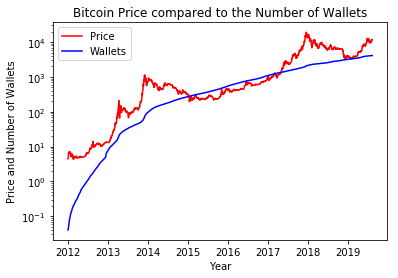

In [68]:
# Plot both daily prices and daily number of wallets for Bitcoin on the same graph

plt.plot(df['Date'], df['Close'], 'r', df['Date'], df['Wallets']/10000, 'b')
plt.yscale('log')
plt.xlabel('Year')
plt.ylabel ('Price and Number of Wallets')
plt.title('Bitcoin Price compared to the Number of Wallets')
plt.legend(labels = ['Price', 'Wallets'])
plt.show()

From the above plot it seems that there is some kind of correlation between the number of wallets (which implies the degree of adoption of Bitcoins worldwide) and the prices of Bitcoins on a log scale. Therefore, by monitoring the level of increase/decrease of total number of wallets on a global scale, it is possible to predict the overall trend of Bitcoin prices over the next couple of years. Also it is worth noting that the rate of change for both quantities seem to be slowing down, indicating the level of volatility is being more stablized.

Now let's import another dataset "[Bitcoin Difficulty](https://www.quandl.com/data/BCHAIN/DIFF)" which is a measure of how difficult it is to find a hash below a given target. This is an indicator of the level of difficulty of Bitcoin mining, which in turn implies the level of scarcity of new Bitcoin supply.

In [69]:
# Import the Bitcoin difficulty dataset

diff = pd.read_csv('../input/bitcoin-difficulty/BCHAIN-DIFF.csv')

In [70]:
# Rename the columns for easier processing
# Also change the data format of the "Date" column while we are here

diff.rename(columns = {'Date': 'Date', 'Value': 'Difficulty'}, inplace = True)
diff['Date'] = pd.to_datetime(diff['Date'])

In [71]:
# Inspect the first a few rows of the dataset

diff.head()

,Date,Difficulty
0,2019-10-26,1.369148e+13
1,2019-10-25,1.369148e+13
2,2019-10-24,1.306911e+13
3,2019-10-23,1.300809e+13
4,2019-10-22,1.300809e+13


In [39]:
# Merge these data with Bitcoin price dataframe for comparison later

df2 = pd.merge(bitstamp_clean_day, diff, how='inner', on='Date')

In [40]:
# Inspect the first a few rows of df2

df2.head()

,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price,Date,Difficulty
0,4.472552,4.472624,4.472552,4.472624,7.590527,34.069690,4.472579,2011-12-31,1.159929e+06
1,4.680778,4.680778,4.680778,4.680778,5.861697,27.856539,4.680778,2012-01-01,1.159929e+06
2,5.000000,5.000000,5.000000,5.000000,11.566478,57.832389,5.000000,2012-01-02,1.159929e+06
3,5.145917,5.145917,5.145917,5.145917,13.506125,68.725391,5.145917,2012-01-03,1.159929e+06
4,5.176708,5.228729,5.176708,5.228729,17.221039,91.624089,5.195443,2012-01-04,1.159929e+06


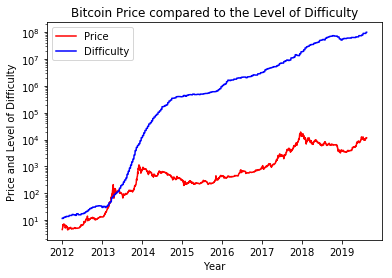

In [72]:
# Plot both daily prices and level of difficulty for Bitcoin mining on the same graph

plt.plot(df2['Date'], df2['Close'], 'r', df2['Date'], df2['Difficulty']/100000, 'b')
plt.yscale('log')
plt.xlabel('Year')
plt.ylabel ('Price and Level of Difficulty')
plt.title('Bitcoin Price compared to the Level of Difficulty')
plt.legend(labels = ['Price', 'Difficulty'])
plt.show()

Again there seems to be a certain kind of correlation here between the level of mining difficulty and price increase over a long run. The level of difficulty of Bitcoin mining has been steadily increasing ever since it was first invented. This difficulty mechanism was hard coded into the blockchain network to ensure that Bitcoins can maintain its scarcity (fixed supply) and therefore prevent the inflation issues that we would experience with traditional currencies. Therefore, it makes perfect economic sense that as the level of supply of Bitcoins decreases its prices would go up.

This notebook is a work in progress. I will keep updating it in the next couple of months. : )